Hey! This is a notebook that demonstrates that the Gibbs Sampler we implemented based off of [Gibbs Sampling For The Uninitiated](https://drum.lib.umd.edu/bitstream/handle/1903/10058/gsfu.pdf?sequence=3&isAllowed=y) actually works!  
Here, in fact, we extend their model to classify articles between 5 classes.

In [1]:
# External dependencies.
import numpy as np
from scipy.io import mmread
import matplotlib.pyplot as plt
import seaborn as sns

# Internal dependencies.
from sampler import GibbsSampler
from document import Document

We use data from the BBC, available [here](http://mlg.ucd.ie/datasets/bbc.html). This dataset consists of articles labelled as one of 5 classes (business, entertainment, politics, sport, tech).  
Below are some helper functions to load the data correctly!

In [2]:
# Read BBC article data.
# Term-frequencies for each document.
def doc_term_frequencies():
    return np.array(mmread('bbc/bbc.mtx').todense()).T

# Labels for each document.
def doc_labels():
    with open('bbc/bbc.classes', encoding='utf-8') as f:
        lines = f.readlines()

        # Remove comments.
        while lines[0][0] == '%':
            lines.pop(0)
        
        # Fill in.
        labels = np.zeros(len(lines), dtype='int')
        for index, line in enumerate(lines):
            labels[index] = int(line.split()[1])

    return labels


In [3]:
# Seed for randomness.
random_seed = 0
np.random.seed(random_seed)

# Load data.
term_frequencies = doc_term_frequencies()
labels = doc_labels()

We randomly keep only around 20% of these labels. The rest will be hidden.

In [4]:
# Keep only 20% of the labels.
visible_labels = [label if np.random.uniform(0, 1) < 0.2 else None for label in labels]
print(visible_labels[:10])



[None, None, None, None, None, None, None, None, None, None]


In [5]:
# Create documents documents.
docs = [Document(term_frequencies[index], label=visible_labels[index]) for index in range(len(labels))]

Now, we can initialize the Gibbs sampler, and start sampling! Recall that our random variables are the labels for each document, and the latent variables theta.

In [6]:
# Initialize sampler.
sampler = GibbsSampler(docs, num_classes=5, random_seed=random_seed)

# Gibbs sampling now!
num_iterations = 25
for iteration in range(1, num_iterations + 1):
    sampler.sample()
    print('Iteration %d of Gibbs sampling complete!' % iteration)

# Obtain predicted labels.
predicted_labels = sampler.predict()
print('Predicted labels: %s' % predicted_labels)

Iteration 1 of Gibbs sampling complete!
Iteration 2 of Gibbs sampling complete!
Iteration 3 of Gibbs sampling complete!
Iteration 4 of Gibbs sampling complete!
Iteration 5 of Gibbs sampling complete!
Iteration 6 of Gibbs sampling complete!
Iteration 7 of Gibbs sampling complete!
Iteration 8 of Gibbs sampling complete!
Iteration 9 of Gibbs sampling complete!
Iteration 10 of Gibbs sampling complete!
Iteration 11 of Gibbs sampling complete!
Iteration 12 of Gibbs sampling complete!
Iteration 13 of Gibbs sampling complete!
Iteration 14 of Gibbs sampling complete!
Iteration 15 of Gibbs sampling complete!
Iteration 16 of Gibbs sampling complete!
Iteration 17 of Gibbs sampling complete!
Iteration 18 of Gibbs sampling complete!
Iteration 19 of Gibbs sampling complete!
Iteration 20 of Gibbs sampling complete!
Iteration 21 of Gibbs sampling complete!
Iteration 22 of Gibbs sampling complete!
Iteration 23 of Gibbs sampling complete!
Iteration 24 of Gibbs sampling complete!
Iteration 25 of Gibbs sam

Now, let's see how we did! Let's visualize via tSNE (any other visualization technique works too!) how well the predicted labels match up with the true ones.

In [7]:
from sklearn.manifold import TSNE
term_frequencies_reduced = TSNE(n_components=2).fit_transform(term_frequencies)

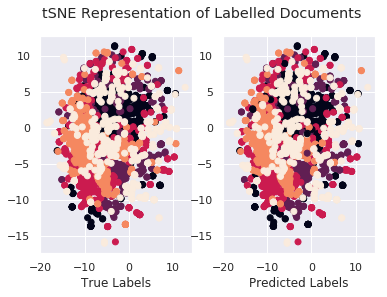

In [8]:
# Plotting.
# Set styles.
sns.set_style('darkgrid')
sns.set(font='DejaVu Sans')

# Plot 2-dimensional tSNE representation of documents.
fig, axs = plt.subplots(ncols=2)
axs[0].scatter(term_frequencies_reduced[:, 0], term_frequencies_reduced[:, 1], c=labels)
axs[1].scatter(term_frequencies_reduced[:, 0], term_frequencies_reduced[:, 1], c=predicted_labels)
axs[0].set_xlabel('True Labels')
axs[1].set_xlabel('Predicted Labels')
plt.suptitle('tSNE Representation of Labelled Documents')
plt.show()

This seems like a really good fit! We can also visualize the confusion matrix for our predictions.

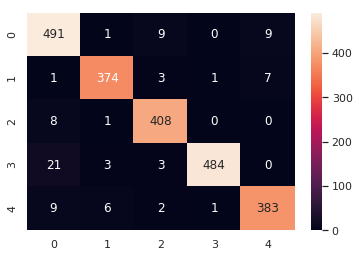

In [9]:
# Plot confusion matrix.
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(labels, predicted_labels), annot=True, fmt='d')
plt.show()

The confusion matrix entries are almost all along the diagonal, which is what we want!